#Spark-Setup-Colab
---
Last Checked : `25-Jan-2026`

In [1]:
!apt-get update -qq
!apt-get install -y openjdk-11-jdk-headless

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  openjdk-11-jre-headless
Suggested packages:
  openjdk-11-demo openjdk-11-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  | fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-11-jdk-headless openjdk-11-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 24 not upgraded.
Need to get 116 MB of archives.
After this operation, 258 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 openjdk-11-jre-headless amd64 11.0.29+7-1ubuntu1~22.04 [42.6 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64

In [2]:
!java -version

openjdk version "17.0.17" 2025-10-21
OpenJDK Runtime Environment (build 17.0.17+10-Ubuntu-122.04)
OpenJDK 64-Bit Server VM (build 17.0.17+10-Ubuntu-122.04, mixed mode, sharing)


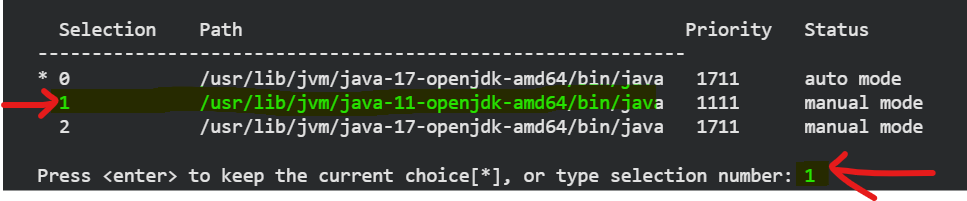

In [3]:
!sudo update-alternatives --config java #run this and when asked for input use the number assigned to java-11-openjdk like the above image

There are 2 choices for the alternative java (providing /usr/bin/java).

  Selection    Path                                         Priority   Status
------------------------------------------------------------
* 0            /usr/lib/jvm/java-17-openjdk-amd64/bin/java   1711      auto mode
  1            /usr/lib/jvm/java-11-openjdk-amd64/bin/java   1111      manual mode
  2            /usr/lib/jvm/java-17-openjdk-amd64/bin/java   1711      manual mode

Press <enter> to keep the current choice[*], or type selection number: 1
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/java to provide /usr/bin/java (java) in manual mode


In [4]:
!java -version # it should show openjdk 11

openjdk version "11.0.29" 2025-10-21
OpenJDK Runtime Environment (build 11.0.29+7-post-Ubuntu-1ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.29+7-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)


In [5]:
!wget -q https://archive.apache.org/dist/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz

!tar -xzf spark-3.5.0-bin-hadoop3.tgz

!ls /content/spark-3.5.0-bin-hadoop3/bin/spark-submit

/content/spark-3.5.0-bin-hadoop3/bin/spark-submit


In [6]:
!pip uninstall -y dataproc-spark-connect pyspark
!pip install -q pyspark==3.5.0 py4j

Found existing installation: dataproc-spark-connect 1.0.1
Uninstalling dataproc-spark-connect-1.0.1:
  Successfully uninstalled dataproc-spark-connect-1.0.1
Found existing installation: pyspark 4.0.1
Uninstalling pyspark-4.0.1:
  Successfully uninstalled pyspark-4.0.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 17.3 MB/s eta 0:00:00


In [7]:
import os
from pyspark.sql import SparkSession

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"


spark = SparkSession.builder \
    .master("local[*]") \
    .config("spark.ui.reverseProxy", "true") \
    .config("spark.ui.reverseProxyUrl", "https://localhost") \
    .config("spark.driver.bindAddress", "127.0.0.1") \
    .appName("ColabSpark") \
    .getOrCreate()


spark

Spark UI : run on localhost in colab, can't be accessed outside.

#Model Training and Testing

In [8]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv

--2026-01-25 13:29:14--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.225.41.45, 13.225.41.124, 13.225.41.5, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.225.41.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16176 (16K) [text/plain]
Saving to: ‘Jamboree_Admission.csv’

Jamboree_Admission. 100%[===================>]  15.80K  --.-KB/s    in 0s      

2026-01-25 13:29:14 (211 MB/s) - ‘Jamboree_Admission.csv’ saved [16176/16176]



In [9]:
df = spark.read.csv("/content/Jamboree_Admission.csv", header=True, inferSchema=True)

In [10]:
df.show()

+----------+---------+-----------+-----------------+---+----+----+--------+----------------+
|Serial No.|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |
+----------+---------+-----------+-----------------+---+----+----+--------+----------------+
|         1|      337|        118|                4|4.5| 4.5|9.65|       1|            0.92|
|         2|      324|        107|                4|4.0| 4.5|8.87|       1|            0.76|
|         3|      316|        104|                3|3.0| 3.5| 8.0|       1|            0.72|
|         4|      322|        110|                3|3.5| 2.5|8.67|       1|             0.8|
|         5|      314|        103|                2|2.0| 3.0|8.21|       0|            0.65|
|         6|      330|        115|                5|4.5| 3.0|9.34|       1|             0.9|
|         7|      321|        109|                3|3.0| 4.0| 8.2|       1|            0.75|
|         8|      308|        101|                2|3.0| 4.0| 7.9|    

In [11]:
df.columns

['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [12]:
import re

for c in df.columns:
    clean = re.sub(r'[^0-9a-zA-Z_]', '_', c)
    df = df.withColumnRenamed(c, clean)

In [13]:
from pyspark.sql.functions import col, sum

def spark_info(df):
    print("Schema:")
    df.printSchema()

    print("\nRows:", df.count())
    print("Columns:", len(df.columns))

    print("\nNull counts:")
    df.select([
        sum(col(c).isNull().cast("int")).alias(c)
        for c in df.columns
    ]).show()

spark_info(df)

Schema:
root
 |-- Serial_No_: integer (nullable = true)
 |-- GRE_Score: integer (nullable = true)
 |-- TOEFL_Score: integer (nullable = true)
 |-- University_Rating: integer (nullable = true)
 |-- SOP: double (nullable = true)
 |-- LOR_: double (nullable = true)
 |-- CGPA: double (nullable = true)
 |-- Research: integer (nullable = true)
 |-- Chance_of_Admit_: double (nullable = true)


Rows: 500
Columns: 9

Null counts:
+----------+---------+-----------+-----------------+---+----+----+--------+----------------+
|Serial_No_|GRE_Score|TOEFL_Score|University_Rating|SOP|LOR_|CGPA|Research|Chance_of_Admit_|
+----------+---------+-----------+-----------------+---+----+----+--------+----------------+
|         0|        0|          0|                0|  0|   0|   0|       0|               0|
+----------+---------+-----------+-----------------+---+----+----+--------+----------------+



In [14]:
df.summary().show()

+-------+-----------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+-------------------+
|summary|       Serial_No_|         GRE_Score|      TOEFL_Score|University_Rating|               SOP|              LOR_|              CGPA|          Research|   Chance_of_Admit_|
+-------+-----------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+-------------------+
|  count|              500|               500|              500|              500|               500|               500|               500|               500|                500|
|   mean|            250.5|           316.472|          107.192|            3.114|             3.374|             3.484| 8.576440000000003|              0.56| 0.7217399999999996|
| stddev|144.4818327679989|11.295148372354712|6.081867659564538|1.143511800759815|0.9910036207566072|0.92

In [45]:
df = df.drop('Serial_No_')

In [46]:
train_df, test_df = df.randomSplit([0.8, 0.2], seed=42)

In [47]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline

feature_cols = df.columns[:-1]

assembler = VectorAssembler(
    inputCols=feature_cols,
    outputCol="features_raw"
)

scaler = StandardScaler(
    inputCol="features_raw",
    outputCol="features",
    withMean=True,    # set False for sparse data
    withStd=True
)

lr = LinearRegression(
    featuresCol="features",
    labelCol="Chance_of_Admit_"
)

pipeline = Pipeline(stages=[assembler, scaler, lr])

In [48]:
#Train
model = pipeline.fit(train_df)

In [49]:
def model_weights(model, feature_cols=feature_cols, decimals=6, sort=True):
    """
    Print formatted feature coefficients and intercept from a Spark ML Pipeline
    containing a Linear/Logistic Regression model as its last stage.

    Parameters
    ----------
    model : pyspark.ml.PipelineModel
        A fitted Spark pipeline model. The final stage must expose
        `coefficients` and `intercept` (e.g., LinearRegressionModel,
        LogisticRegressionModel).

    feature_cols : list of str, optional
        Names of input features in the same order used during model training.
        Default is the global variable `feature_cols`.

    decimals : int, optional (default=6)
        Number of decimal places to display for coefficients and intercept.

    sort : bool, optional (default=True)
        If True, features are sorted by absolute coefficient value
        (largest impact first).

    Output
    ------
    Prints a formatted table:

        Feature_Name        :   Coefficient
        -------------------------------
        ...
        Intercept           :   value

    Notes
    -----
    - Formatting is purely cosmetic; model values are not modified.
    - Sorting uses absolute coefficient magnitude to reflect feature influence.
    """

    lr_model = model.stages[-1]   # last stage in the pipeline

    weights = list(zip(feature_cols, lr_model.coefficients))

    if sort:
        weights.sort(key=lambda x: abs(x[1]), reverse=True)

    max_len = max(len(name) for name in feature_cols)

    print("-" * (max_len + 15))
    for name, w in weights:
        print(f"{name:<{max_len}} : {w:>12.{decimals}f}")

    print("-" * (max_len + 15))
    print(f"{'Intercept':<{max_len}} : {lr_model.intercept:>12.{decimals}f}")


In [50]:
model_weights(model, feature_cols=feature_cols)

--------------------------------
CGPA              :     0.069627
GRE_Score         :     0.021540
TOEFL_Score       :     0.018828
LOR_              :     0.014922
Research          :     0.011148
University_Rating :     0.009494
SOP               :    -0.001176
--------------------------------
Intercept         :     0.720939


In [51]:
#predict
predictions_test = model.transform(test_df)
predictions_train = model.transform(train_df)

In [52]:
from pyspark.sql.functions import round

predictions_test.select(
    "Chance_of_Admit_",
    round("prediction", 2).alias("prediction")
).show()


+----------------+----------+
|Chance_of_Admit_|prediction|
+----------------+----------+
|            0.64|      0.56|
|            0.47|      0.46|
|            0.57|      0.52|
|            0.47|      0.48|
|            0.52|      0.53|
|            0.44|      0.52|
|            0.53|       0.6|
|            0.51|      0.54|
|            0.36|      0.43|
|            0.64|      0.68|
|            0.62|      0.62|
|            0.56|      0.55|
|            0.71|      0.61|
|            0.67|      0.58|
|            0.57|      0.66|
|            0.65|      0.66|
|            0.64|      0.59|
|            0.69|      0.63|
|            0.78|       0.7|
|            0.68|      0.59|
+----------------+----------+
only showing top 20 rows



In [53]:
predictions_train.select(
    "Chance_of_Admit_",
    round("prediction", 2).alias("prediction")
).show()

+----------------+----------+
|Chance_of_Admit_|prediction|
+----------------+----------+
|            0.47|      0.48|
|            0.45|      0.51|
|            0.46|      0.44|
|            0.49|      0.47|
|            0.46|      0.42|
|            0.37|      0.48|
|            0.69|      0.53|
|            0.44|       0.5|
|            0.49|      0.52|
|            0.61|      0.56|
|             0.6|      0.52|
|            0.43|      0.52|
|            0.34|      0.47|
|            0.59|      0.52|
|            0.54|      0.56|
|            0.57|      0.58|
|            0.51|       0.5|
|            0.45|      0.47|
|            0.34|      0.56|
|            0.53|      0.49|
+----------------+----------+
only showing top 20 rows



In [54]:
from pyspark.ml.evaluation import RegressionEvaluator

def scores(pred_df = predictions_test, labelCol = 'y', predictionCol='prediction', feature_cols = feature_cols):

    evaluator = RegressionEvaluator(
        labelCol=labelCol,
        predictionCol=predictionCol
    )

    mse  = evaluator.setMetricName("mse").evaluate(pred_df)
    rmse = evaluator.setMetricName("rmse").evaluate(pred_df)
    r2   = evaluator.setMetricName("r2").evaluate(pred_df)
    mae  = evaluator.setMetricName("mae").evaluate(pred_df)

    n = pred_df.count()
    p = len(feature_cols)   # same list you gave to VectorAssembler

    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)


    print(f"MSE     : {mse}")
    print(f"RMSE    : {rmse}")
    print(f"MAE     : {mae}")
    print(f"R²      : {r2}")
    print(f"Adj R²  : {adj_r2}")

In [55]:
scores(pred_df=predictions_test, labelCol='Chance_of_Admit_', predictionCol='prediction', feature_cols=feature_cols)

MSE     : 0.002496688625770997
RMSE    : 0.04996687528524269
MAE     : 0.03506476526012831
R²      : 0.873828393919839
Adj R²  : 0.8604465569113371


In [56]:
scores(pred_df=predictions_train, labelCol='Chance_of_Admit_', predictionCol='prediction', feature_cols=feature_cols)

MSE     : 0.0037321366272906695
RMSE    : 0.061091215631141844
MAE     : 0.04408275769677765
R²      : 0.8123851663923923
Adj R²  : 0.8092432911884372


In [57]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

paramGrid = (
    ParamGridBuilder()
    .addGrid(lr.regParam, [0.001, 0.01, 0.1, 1.0, 10.0])
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])  # Ridge, ElasticNet, Lasso
    .build()
)

evaluator = RegressionEvaluator(labelCol="Chance_of_Admit_", metricName="r2")

cv = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=paramGrid,
    evaluator=evaluator,
    numFolds=5,
    parallelism=4
)

cv_model = cv.fit(train_df)

In [78]:
len(cv_model.avgMetrics)

15

In [79]:
cv_model.avgMetrics

[np.float64(0.8053860728922064),
 np.float64(0.8055506900553409),
 np.float64(0.8054909802558544),
 np.float64(0.8043425765368429),
 np.float64(0.8033672783124566),
 np.float64(0.7979122415015321),
 np.float64(0.7780698158684342),
 np.float64(0.5945870845826936),
 np.float64(0.2566299420960537),
 np.float64(0.49473825478076244),
 np.float64(-0.012149650644847743),
 np.float64(-0.012149650644847743),
 np.float64(0.08350548381598906),
 np.float64(-0.012149650644847743),
 np.float64(-0.012149650644847743)]

In [81]:

def readable(params):
    return {p.name: v for p, v in params.items()}

for params, metric in zip(cv.getEstimatorParamMaps(), cv_model.avgMetrics):
    print(metric, readable(params))


0.8053860728922064 {'regParam': 0.001, 'elasticNetParam': 0.0}
0.8055506900553409 {'regParam': 0.001, 'elasticNetParam': 0.5}
0.8054909802558544 {'regParam': 0.001, 'elasticNetParam': 1.0}
0.8043425765368429 {'regParam': 0.01, 'elasticNetParam': 0.0}
0.8033672783124566 {'regParam': 0.01, 'elasticNetParam': 0.5}
0.7979122415015321 {'regParam': 0.01, 'elasticNetParam': 1.0}
0.7780698158684342 {'regParam': 0.1, 'elasticNetParam': 0.0}
0.5945870845826936 {'regParam': 0.1, 'elasticNetParam': 0.5}
0.2566299420960537 {'regParam': 0.1, 'elasticNetParam': 1.0}
0.49473825478076244 {'regParam': 1.0, 'elasticNetParam': 0.0}
-0.012149650644847743 {'regParam': 1.0, 'elasticNetParam': 0.5}
-0.012149650644847743 {'regParam': 1.0, 'elasticNetParam': 1.0}
0.08350548381598906 {'regParam': 10.0, 'elasticNetParam': 0.0}
-0.012149650644847743 {'regParam': 10.0, 'elasticNetParam': 0.5}
-0.012149650644847743 {'regParam': 10.0, 'elasticNetParam': 1.0}


In [65]:
best_pipeline = cv_model.bestModel

In [68]:
print("Best lambda:", best_pipeline.stages[-1].getRegParam())
print("Best l1_ratio   :", best_pipeline.stages[-1].getElasticNetParam())

Best lambda: 0.001
Best l1_ratio   : 0.5


In [71]:
prediction_ElasticNet_CV_test = best_pipeline.transform(test_df)
prediction_ElasticNet_CV_train = best_pipeline.transform(train_df)

In [73]:
scores(pred_df=prediction_ElasticNet_CV_test, labelCol='Chance_of_Admit_', predictionCol='prediction', feature_cols=feature_cols)

MSE     : 0.0024851946224218623
RMSE    : 0.049851726373535576
MAE     : 0.03503482212479454
R²      : 0.8744092500377714
Adj R²  : 0.8610890189811714


In [74]:
scores(pred_df=prediction_ElasticNet_CV_train, labelCol='Chance_of_Admit_', predictionCol='prediction', feature_cols=feature_cols)

MSE     : 0.0037332326013642934
RMSE    : 0.06110018495360135
MAE     : 0.044056751215540896
R²      : 0.8123300716801684
Adj R²  : 0.8091872738374917


In [75]:
model_weights(best_pipeline, feature_cols=feature_cols)

--------------------------------
CGPA              :     0.068557
GRE_Score         :     0.021877
TOEFL_Score       :     0.018717
LOR_              :     0.014523
Research          :     0.010848
University_Rating :     0.009095
SOP               :     0.000000
--------------------------------
Intercept         :     0.720939


In [76]:
#Location where model will be saved
model_path = "/content/models/best_lr_pipeline"

# save
best_pipeline.write().overwrite().save(model_path)



from pyspark.ml import PipelineModel

# load
model = PipelineModel.load(model_path)

# predict
model.transform(df)